## Install and import dependencies

In [1]:
!pip install pystan fbprophet

In [2]:
import pandas as pd
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


## Read in data and Process dates
- Use 2 column so one for date and then one called y which represents our values

In [3]:
df = pd.read_csv("dataset.csv")

In [4]:
df.head(10)

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000
5,6012018,2667437,QLD_CW_ST0203,2527.000
6,7012018,2667437,QLD_CW_ST0203,2527.000
7,8012018,2667437,QLD_CW_ST0203,2793.000
8,9012018,2667437,QLD_CW_ST0203,2793.000
9,10012018,2667437,QLD_CW_ST0203,2793.000


In [5]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [6]:
print(df["Product"].unique())
print(df["Store"].unique())

[2667437]
['QLD_CW_ST0203']


In [7]:
df.dtypes 

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [8]:
#iterated through "Time Date" -> 1012018 -> 1/01/2018 and extracting year month day  
df["Year"]  = df["Time Date"].apply(lambda x: str(x)[-4:])      # 2018 array indexing method
df["Month"] = df["Time Date"].apply(lambda x: str(x)[-6:-4])    # 01    
df["Day"]   = df["Time Date"].apply(lambda x: str(x)[:-6])      #  1
df["ds"]    = pd.DatetimeIndex(df["Year"] + "-" + df["Month"] + "-" + df["Day"])

In [9]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [10]:
#Check datetime type
df.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
ds           datetime64[ns]
dtype: object

In [11]:
# df[df["Product"] == "test"] if you have more than one product or other you can use this filter.
df.drop(["Time Date", "Product", "Store", "Year", "Month", "Day"], axis = 1, inplace = True) # inplace = True -> apply on this dataset not create new one.
df.columns = ["y", "ds"] 

In [12]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


## Train Model

In [13]:
m = Prophet(interval_width = 0.95, daily_seasonality = True)
model = m.fit(df)

## Forecast Away

In [14]:
df.tail()

,y,ds
1075,3167.594500,2020-12-12
1076,3167.594500,2020-12-13
1077,3383.354511,2020-12-14
1078,2714.591329,2020-12-15
1079,2585.035107,2020-12-16


In [15]:
future = m.make_future_dataframe(periods = 100, freq = "D") #Forecasting futher forward to 100 day
forecast = m.predict(future) # use predict function to predict m 

In [16]:
forecast.head() # the last column yhat that represent prediction 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.489276,789.945741,4006.668311,3041.489276,3041.489276,-641.915345,-641.915345,-641.915345,467.724032,...,16.611941,16.611941,16.611941,-1126.251318,-1126.251318,-1126.251318,0.0,0.0,0.0,2399.573931
1,2018-01-02,3042.246698,792.275464,3934.170600,3042.246698,3042.246698,-652.029690,-652.029690,-652.029690,467.724032,...,-11.285067,-11.285067,-11.285067,-1108.468655,-1108.468655,-1108.468655,0.0,0.0,0.0,2390.217008
2,2018-01-03,3043.004119,850.308312,4074.825033,3043.004119,3043.004119,-626.188801,-626.188801,-626.188801,467.724032,...,-4.407267,-4.407267,-4.407267,-1089.505566,-1089.505566,-1089.505566,0.0,0.0,0.0,2416.815318
3,2018-01-04,3043.761541,786.760014,4007.028389,3043.761541,3043.761541,-579.252371,-579.252371,-579.252371,467.724032,...,22.462032,22.462032,22.462032,-1069.438435,-1069.438435,-1069.438435,0.0,0.0,0.0,2464.509170
4,2018-01-05,3044.518962,753.761230,3997.837177,3044.518962,3044.518962,-615.260367,-615.260367,-615.260367,467.724032,...,-34.588120,-34.588120,-34.588120,-1048.396280,-1048.396280,-1048.396280,0.0,0.0,0.0,2429.258595


In [17]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4240.642325,2128.556170,5369.091871,4237.381324,4243.915569,-514.955476,-514.955476,-514.955476,467.724032,...,16.611941,16.611941,16.611941,-999.291449,-999.291449,-999.291449,0.0,0.0,0.0,3725.686849
1176,2021-03-23,4241.721263,2048.885435,5314.672872,4238.411329,4245.031303,-532.411629,-532.411629,-532.411629,467.724032,...,-11.285067,-11.285067,-11.285067,-988.850594,-988.850594,-988.850594,0.0,0.0,0.0,3709.309634
1177,2021-03-24,4242.800202,2228.325928,5248.301785,4239.441335,4246.166558,-517.870965,-517.870965,-517.870965,467.724032,...,-4.407267,-4.407267,-4.407267,-981.187730,-981.187730,-981.187730,0.0,0.0,0.0,3724.929237
1178,2021-03-25,4243.879140,2166.829176,5401.743583,4240.471341,4247.294375,-486.699803,-486.699803,-486.699803,467.724032,...,22.462032,22.462032,22.462032,-976.885867,-976.885867,-976.885867,0.0,0.0,0.0,3757.179337
1179,2021-03-26,4244.958078,2131.255160,5321.686199,4241.501347,4248.416905,-543.307143,-543.307143,-543.307143,467.724032,...,-34.588120,-34.588120,-34.588120,-976.443055,-976.443055,-976.443055,0.0,0.0,0.0,3701.650936


In [18]:
forecast[["ds", "yhat"]]

,ds,yhat
0,2018-01-01,2399.573931
1,2018-01-02,2390.217008
2,2018-01-03,2416.815318
3,2018-01-04,2464.509170
4,2018-01-05,2429.258595
...,...,...
1175,2021-03-22,3725.686849
1176,2021-03-23,3709.309634
1177,2021-03-24,3724.929237
1178,2021-03-25,3757.179337


#### What chart this tell us?
* black dot represent a actual value.
* blue line is prediction and shaded area is represent different bounding boxes

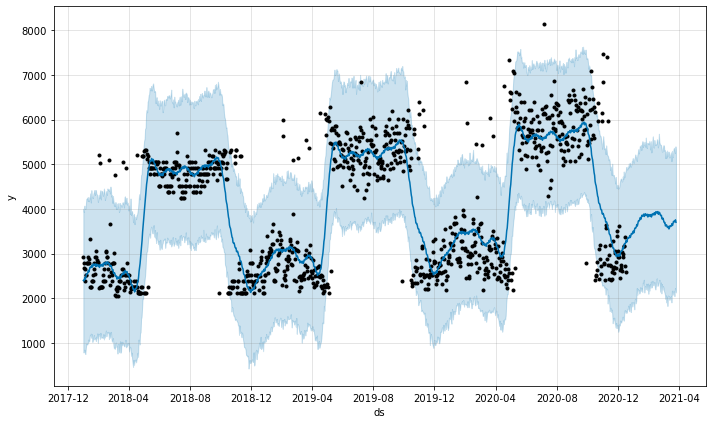

In [19]:
plot1 = m.plot(forecast)

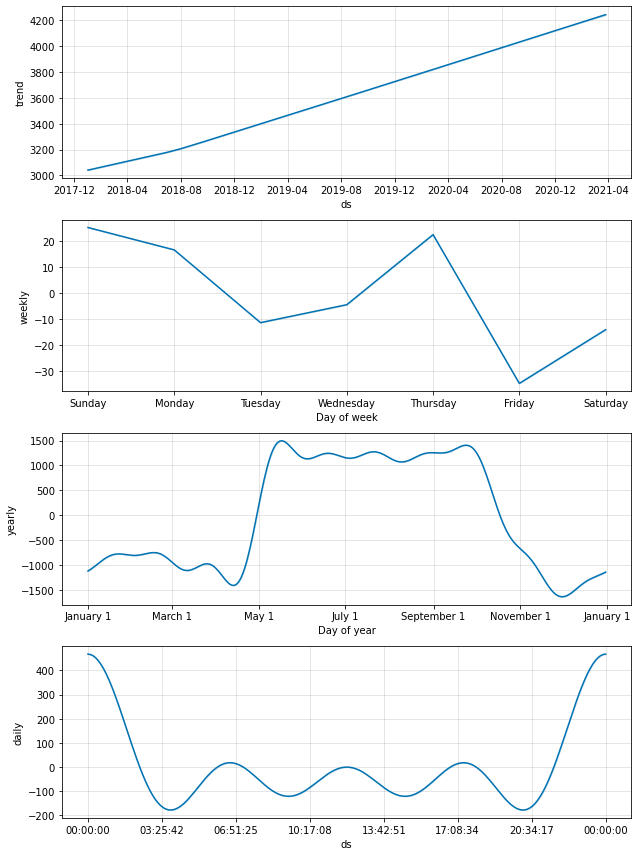

In [20]:
plot2 = m.plot_components(forecast)